In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('Molpos-tRNA' , 'Molpos-ribosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('Molpos-tRNA' , 'Molpos-tRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('Molpos-tRNA' , 'Molpos-crowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    print(len(r2_lists[0]))
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS

3704
3704
3704
3704
3704
3704
3704


Text(0, 0.5, 'MSD')

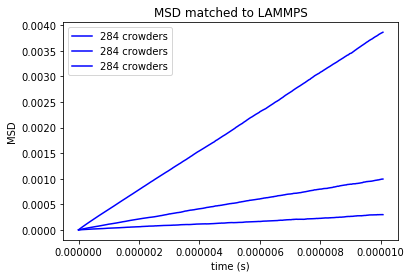

In [2]:
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190304_1331/"
MSD_data = MSD(path+data,200,250,'tRNA')

plt.plot(MSD(path+data,200,250,'ribosome')[2],MSD(path+data,200,250,'ribosome')[1],color='blue',label="284 crowders")
plt.plot(MSD(path+data,200,250,'tRNA')[2],MSD(path+data,200,250,'tRNA')[1],color='blue',label="284 crowders")
plt.plot(MSD(path+data,200,250,'crowder')[2],MSD(path+data,200,250,'crowder')[1],color='blue',label="284 crowders")

plt.legend()
plt.title('MSD matched to LAMMPS')

plt.xlabel("time (s)")
plt.ylabel("MSD")


10100

10100

10100

10100

10100

10100


Text(0, 0.5, 'MSD')

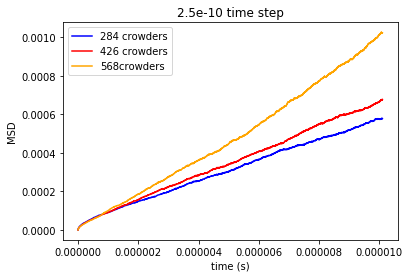

In [53]:
#1e-9 timestep
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "181031_2017/"
plt.plot(MSD(path+data,150,200)[2],MSD(path+data,150,200)[1],color='blue',label="284 crowders")
plt.plot(MSD(path+data,150,200)[2],MSD(path+data,350,400)[1],color='red', label="426 crowders")
plt.plot(MSD(path+data,150,200)[2],MSD(path+data,550,600)[1],color='orange',label="568crowders")
plt.legend()
plt.title('2.5e-10 time step')

plt.xlabel("time (s)")
plt.ylabel("MSD")

In [108]:
#8e-10 timestep
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "181031_2017/"
plt.plot(MSD(path+data,0,50)[1],color='blue',label="284 crowders")
plt.plot(MSD(path+data,200,250)[1],color='red', label="426 crowders")
plt.plot(MSD(path+data,400,450)[1],color='orange',label="568crowders")
plt.legend()
plt.title('2.5e-10 time step')

plt.xlabel("time steps")
plt.ylabel("MSD")

Error (e.g., Missing expt or incorrect input)


IndexError: list index out of range

In [109]:
#4e-10 timestep
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "181031_2017/"
plt.plot(MSD(path+data,50,100)[1],color='blue',label="284 crowders")
plt.plot(MSD(path+data,250,300)[1],color='red', label="426 crowders")
plt.plot(MSD(path+data,450,500)[1],color='orange',label="568crowders")
plt.legend()
plt.title('2.5e-10 time step')

plt.xlabel("time steps")
plt.ylabel("MSD")

IndexError: list index out of range

40400
40400
40400


Text(0, 0.5, 'MSD')

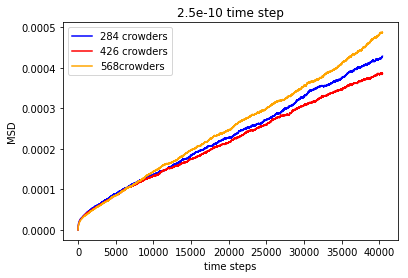

In [18]:
#2.5e-10 timestep
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "181031_2017/"
plt.plot(MSD(path+data,100,150)[1],color='blue',label="284 crowders")
plt.plot(MSD(path+data,300,350)[1],color='red', label="426 crowders")
plt.plot(MSD(path+data,500,550)[1],color='orange',label="568crowders")
plt.legend()
plt.title('2.5e-10 time step')

plt.xlabel("time steps")
plt.ylabel("MSD")

101000


Text(0, 0.5, 'MSD')

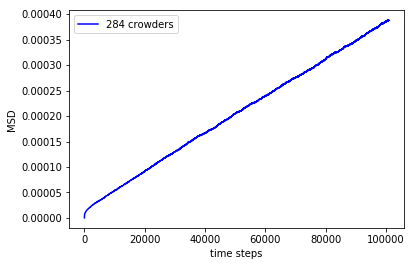

In [25]:
#2.5e-10 timestep
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190221_1248/"
plt.plot(MSD(path+data,0,50)[1],color='blue',label="284 crowders")

plt.legend()

plt.xlabel("time steps")
plt.ylabel("MSD")

In [19]:
MSD(path+data,0,50)[1][50000]-MSD(path+data,0,50)[1][40000]

101000
101000


3.835506000000004e-05

In [20]:
((3.835506000000004e-05/(2*10000)))*(2.5e10)

47.943825000000054

101000


Text(0, 0.5, 'MSD')

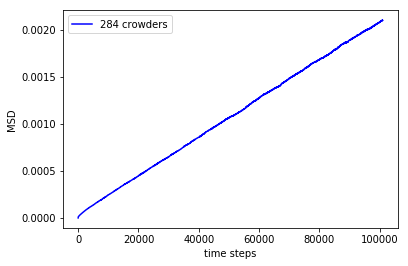

In [160]:
#2.5e-10 timestep
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190228_2219/"
plt.plot(MSD(path+data,0,50)[1],color='blue',label="284 crowders")

plt.legend()

plt.xlabel("time steps")
plt.ylabel("MSD")

In [33]:
((MSD(path+data,0,50)[1][100000]-MSD(path+data,0,50)[1][0])/(2*100000))*(1e10)

101000
101000


57.68704200000001

In [34]:
MSD(path+data,0,50)[1][-1]

101000


0.0011604896800000003

Error (e.g., Missing expt or incorrect input)
2000
Error (e.g., Missing expt or incorrect input)
2000
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
2000
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
2000
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., M

Text(0, 0.5, 'MSD')

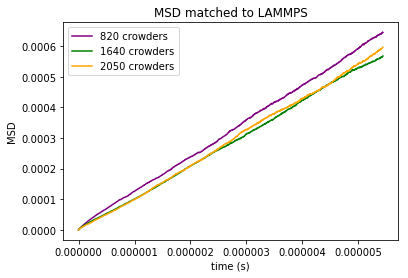

In [40]:
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190416_1210/"

#plt.plot(MSD(path+data,0,50,'tRNA')[2],MSD(path+data,0,50,'tRNA')[1],color='red',label="0 crowders")
plt.plot(MSD(path+data,50,100,'tRNA')[2],MSD(path+data,50,100,'tRNA')[1],color='purple',label="820 crowders")
plt.plot(MSD(path+data,100,150,'tRNA')[2],MSD(path+data,100,150,'tRNA')[1],color='green',label="1640 crowders")
plt.plot(MSD(path+data,150,200,'tRNA')[2],MSD(path+data,150,200,'tRNA')[1],color='orange',label="2050 crowders")
#plt.plot(MSD(path+data,200,250,'tRNA')[2],MSD(path+data,200,250,'tRNA')[1],color='orange',label="2050 crowders")

plt.legend()
plt.title('MSD matched to LAMMPS')

plt.xlabel("time (s)")
plt.ylabel("MSD")

In [112]:
D=list()
for i in range(0,4):
    MSD_data = MSD(path+data,i*50,i*50+50,'tRNA')
    D.append((MSD_data[1][-1]-MSD_data[1][0])/(6*(MSD_data[2][-1]-MSD_data[2][0])))
print(D)

3704
3704
3704
Error (e.g., Missing expt or incorrect input)
3704
[45.120692416853316, 33.496439691188385, 17.243934435778094, 19.759572408493508]


Error (e.g., Missing expt or incorrect input)
2000
Error (e.g., Missing expt or incorrect input)
2000
2000
2000
Error (e.g., Missing expt or incorrect input)
2000
Error (e.g., Missing expt or incorrect input)
2000
2000
2000
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
2000
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
2000
[37.67722602051772, 15.448292400960396, 13.578196044716883, 8.640166702414707, 4.32871317708274]
2000
2000
2000
2000
Error (e.g., Missing expt or incorrect input)
2000
Error (e.g., Missing expt or incorrect input)
2000
2000
2000
2000
2000
[48.3054113504914, 31.231665293025298, 22.552442538900877, 7.360921973393974, 1.0796647932927945]
[0.04845743 0.07494816 0.10379168 0.31799766 2.16803957]
[0.01929634 0.04706232 0.05354411 0.08414566 0.1679558 ]


Text(0.5, 0, 'Crowder volume fraction')

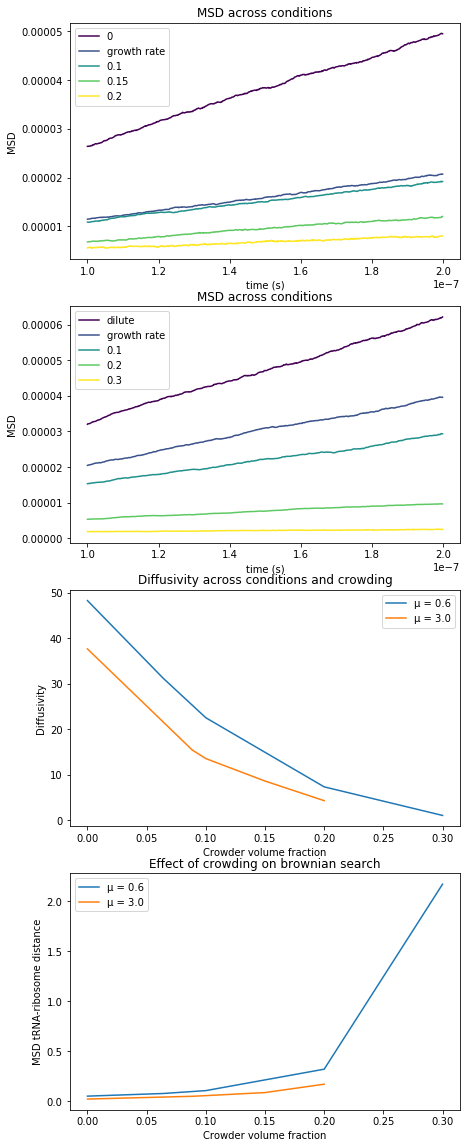

<Figure size 432x288 with 0 Axes>

In [157]:
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190417_1149/"

fig,ax=plt.subplots(4,1,figsize=(7,20))

labels = ['0','growth rate','0.1','0.15','0.2']
cmap = plt.cm.get_cmap('viridis')
interv = 25
expts = np.arange(150,275,interv)
D3=list()
for i,start in enumerate(expts):
    x = MSD(path+data,start,start+interv,'tRNA')[2][1000:]
    y = MSD(path+data,start,start+interv,'tRNA')[1][1000:]
    y_model = np.polyfit(x,y,1)
    D3.append(y_model[0]/6)
    ax[0].plot(x,y,color=cmap((start-expts[0])/(expts[-1]-expts[0])),label=labels[i])

ax[0].legend()
ax[0].set_title('MSD across conditions')
ax[0].set_xlabel("time (s)")
ax[0].set_ylabel("MSD")
print(D3)

labels = ['dilute','growth rate','0.1','0.2','0.3']
interv = 25
expts = np.arange(0,125,interv)
D06=list()
for i,start in enumerate(expts):
    x = MSD(path+data,start,start+interv,'tRNA')[2][1000:]
    y = MSD(path+data,start,start+interv,'tRNA')[1][1000:]
    y_model = np.polyfit(x,y,1)
    D06.append(y_model[0]/6)
    ax[1].plot(x,y,color=cmap((start-expts[0])/(expts[-1]-expts[0])),label=labels[i])

ax[1].legend()
ax[1].set_title('MSD across conditions')
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel("MSD")
print(D06)
plt.figure(2)
ax[2].plot([0,0.064,0.1,0.2,0.3],D06,label='µ = 0.6')
ax[2].plot([0,0.0886,0.1,0.15,0.2],D3,label='µ = 3.0')
ax[2].set_title('Diffusivity across conditions and crowding')
ax[2].set_xlabel('Crowder volume fraction')
ax[2].set_ylabel('Diffusivity')
ax[2].legend()

#tRNA_dist = np.array([0.04838136,0.04265897,0.03725069, 0.03248931, 0.02949553, 0.02696354])
MSD_tRNARibDist06 = 0.04838136**2/np.array(D06)
print(MSD_tRNARibDist06*1000)
ax[3].plot([0,0.064,0.1,0.2,0.3],MSD_tRNARibDist06*1000,label='µ = 0.6')

MSD_tRNARibDist30 = 0.02696354**2/np.array(D3)
print(MSD_tRNARibDist30*1000)
ax[3].plot([0,0.0886,0.1,0.15,0.2],MSD_tRNARibDist30*1000,label='µ = 3.0')
ax[3].legend()
ax[3].set_title('Effect of crowding on brownian search')
ax[3].set_ylabel('MSD tRNA-ribosome distance')
ax[3].set_xlabel('Crowder volume fraction')

#Extra fig: Could plot # of non-cognate reactions per mixtime, also introducing
#idea of facilitated mixing; or also time for both kinetic parameter
#sets. This will then form the bridge to reaction time in figure 3.
#I suspect showing time with diff sets of params in same format as 3 & 4 figs will 
# be most clear.
#Instead of MSD distance, can calculate mix time in a voxel with no reactions first; and then 
#in voxel with reactions (to show facilitated mixing)

[0.00807624 0.01249136 0.01729861 0.05299961 0.36133993]
[0.00321606 0.00784372 0.00892402 0.01402428 0.02799263]


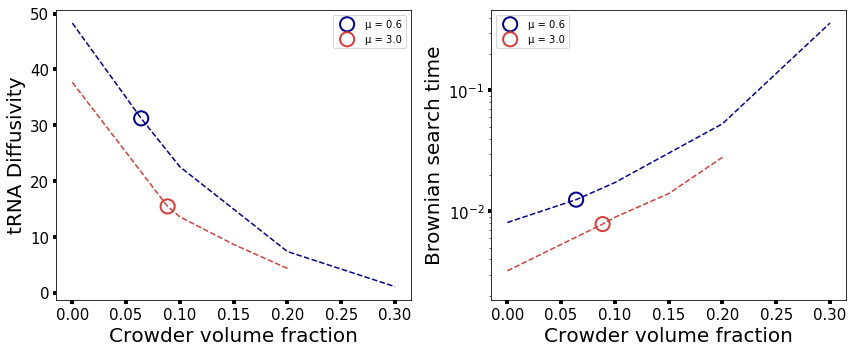

In [203]:
fig,ax=plt.subplots(1,2,figsize=(12,5))

line=ax[0].plot([0,0.064,0.1,0.2,0.3],D06,color='darkblue',linestyle='--')[0]
ax[0].plot([0,0.0886,0.1,0.15,0.2],D3,color='#D43F3A',linestyle='--')
ax[0].scatter([0.064],[D06[1]],color='darkblue',label='µ = 0.6', facecolor='none',s=200,linewidth=2)
ax[0].scatter([0.0886],[D3[1]],color='#D43F3A',label='µ = 3.0',facecolor='none',s=200,linewidth=2)
#ax[0].set_title('tRNA diffusivity varies with crowding',size=20)
ax[0].set_xlabel('Crowder volume fraction',size=20)
ax[0].set_ylabel('tRNA Diffusivity',size=20)
ax[0].legend()
ax[0].tick_params(axis='both', which='major', width=4,labelsize=15)

#tRNA_dist = np.array([0.04838136,0.04265897,0.03725069, 0.03248931, 0.02949553, 0.02696354])
MSD_tRNARibDist06 = (0.04838136**2/(6*np.array(D06)))*1000
ax[1].plot([0,0.064,0.1,0.2,0.3],MSD_tRNARibDist06,color='darkblue',linestyle='--')
ax[1].scatter([0.064],[MSD_tRNARibDist06[1]],color='darkblue',label='µ = 0.6', facecolor='none',s=200,linewidth=2)

MSD_tRNARibDist30 = (0.02696354**2/(6*np.array(D3)))*1000
ax[1].plot([0,0.0886,0.1,0.15,0.2],MSD_tRNARibDist30,color='#D43F3A',linestyle='--')
ax[1].scatter([0.0886],[MSD_tRNARibDist30[1]],color='#D43F3A',label='µ = 3.0',facecolor='none',s=200,linewidth=2)

ax[1].set_yscale('log')

#ax[1].set_title('Effect of crowding on brownian search',size=20)
ax[1].set_ylabel('Brownian search time',size=20)
ax[1].set_xlabel('Crowder volume fraction',size=20)
ax[1].legend()
ax[1].tick_params(axis='both', which='major', width=4,labelsize=15)


print(MSD_tRNARibDist06)
print(MSD_tRNARibDist30)
plt.tight_layout()
#0.13+0.24,0.42+0.1

#Could instead of "search time" get how long mixing takes with no reactions
#

In [84]:
from analysis_utils import *
%load_ext autoreload
%autoreload
mixtime = mixTime('/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/expt-99-Reactions-20190418.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 9 columns):
time         2208 non-null float64
rxn          2208 non-null object
x            2208 non-null float64
y            2208 non-null float64
z            2208 non-null float64
reactantA    2208 non-null int64
reactantB    2208 non-null int64
productA     2208 non-null int64
productB     0 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 271.8 KB
None


In [85]:
mixtime[0]

[0.0039942499999999995,
 0.004775899999999999,
 0.0038246900000000004,
 0.003406799999999998,
 0.004105000000000001,
 0.005164300000000004,
 0.0026838]

Text(0, 0.5, 'MSD')

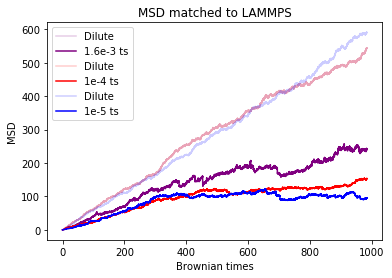

In [132]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('Molpos-tRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('Molpos-tRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('Molpos-tRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA

path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190823_1254/"
#MSD_data = MSD(path+data,0,2,'tRNA')
plt.plot(MSD(path+data,0,3,'tRNA')[2],MSD(path+data,0,3,'tRNA')[1],color='purple',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,9,10,'tRNA')[2],MSD(path+data,9,10,'tRNA')[1],color='purple',label="1.6e-3 ts")

plt.plot(MSD(path+data,3,6,'tRNA')[2],MSD(path+data,0,3,'tRNA')[1],color='red',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,12,15,'tRNA')[2],MSD(path+data,12,15,'tRNA')[1],color='red',label="1e-4 ts")

plt.plot(MSD(path+data,6,9,'tRNA')[2],MSD(path+data,6,9,'tRNA')[1],color='blue',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,15,17,'tRNA')[2],MSD(path+data,15,17,'tRNA')[1],color='blue',label="1e-5 ts")

#plt.plot(MSD(path+data,200,250,'crowder')[2],MSD(path+data,200,250,'crowder')[1],color='blue',label="284 crowders")

plt.legend()
plt.title('MSD matched to LAMMPS')

plt.xlabel("Brownian times")
plt.ylabel("MSD")

Text(0, 0.5, 'MSD')

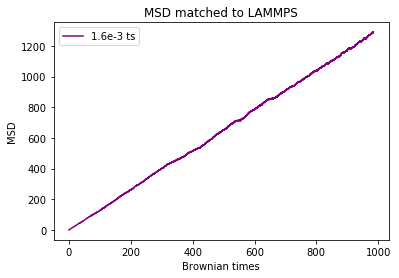

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('Molpos-tRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('Molpos-tRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('Molpos-tRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA

path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190823_1254/"
#MSD_data = MSD(path+data,0,2,'tRNA')
#plt.plot(MSD(path+data,200,250,'ribosome')[2],MSD(path+data,200,250,'ribosome')[1],color='blue',label="284 crowders")
plt.plot(MSD(path+data,0,3,'crowder')[2],MSD(path+data,0,3,'crowder')[1],color='purple',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,9,12,'crowder')[2],MSD(path+data,9,12,'crowder')[1],color='purple',label="1.6e-3 ts")

plt.plot(MSD(path+data,3,6,'crowder')[2],MSD(path+data,0,3,'crowder')[1],color='red',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,12,15,'crowder')[2],MSD(path+data,12,15,'crowder')[1],color='red',label="1e-4 ts")

plt.plot(MSD(path+data,6,9,'crowder')[2],MSD(path+data,6,9,'crowder')[1],color='blue',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,15,17,'crowder')[2],MSD(path+data,15,17,'crowder')[1],color='blue',label="1e-5 ts")

#plt.plot(MSD(path+data,200,250,'crowder')[2],MSD(path+data,200,250,'crowder')[1],color='blue',label="284 crowders")

plt.legend()
plt.title('MSD matched to LAMMPS')

plt.xlabel("Brownian times")
plt.ylabel("MSD")

Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)


Text(0, 0.5, 'MSD')

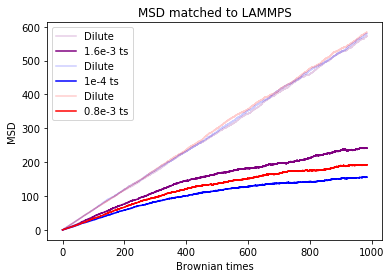

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190826_1154/"
#MSD_data = MSD(path+data,0,2,'tRNA')
#plt.plot(MSD(path+data,200,250,'ribosome')[2],MSD(path+data,200,250,'ribosome')[1],color='blue',label="284 crowders")
n =50
plt.plot(MSD(path+data,0,n,'tRNA')[2],MSD(path+data,0,n,'tRNA')[1],color='purple',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,4*n,5*n,'tRNA')[2],MSD(path+data,4*n,5*n,'tRNA')[1],color='purple',label="1.6e-3 ts")

plt.plot(MSD(path+data,2*n,3*n,'tRNA')[2],MSD(path+data,2*n,3*n,'tRNA')[1],color='blue',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,6*n,7*n,'tRNA')[2],MSD(path+data,6*n,7*n,'tRNA')[1],color='blue',label="1e-4 ts")

path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190827_0950/"
plt.plot(MSD(path+data,2*n,3*n,'tRNA')[2],MSD(path+data,2*n,3*n,'tRNA')[1],color='red',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,5*n,6*n,'tRNA')[2],MSD(path+data,5*n,6*n,'tRNA')[1],color='red',label="0.8e-3 ts")


plt.legend()
plt.title('MSD matched to LAMMPS')

plt.xlabel("Brownian times")
plt.ylabel("MSD")

Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)


Text(0, 0.5, 'MSD')

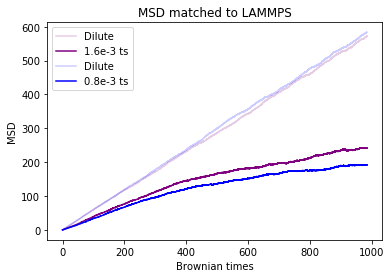

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190827_0950/"
n =50
plt.plot(MSD(path+data,0,n,'tRNA')[2],MSD(path+data,0,n,'tRNA')[1],color='purple',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,3*n,4*n,'tRNA')[2],MSD(path+data,3*n,4*n,'tRNA')[1],color='purple',label="1.6e-3 ts")

#plt.plot(MSD(path+data,n,2*n,'tRNA')[2],MSD(path+data,n,2*n,'tRNA')[1],color='red',alpha=0.2,label="Dilute")
#plt.plot(MSD(path+data,4*n,5*n,'tRNA')[2],MSD(path+data,5*n+1,5*n+2,'tRNA')[1],color='red',label="1e-3 ts")

plt.plot(MSD(path+data,2*n,3*n,'tRNA')[2],MSD(path+data,2*n,3*n,'tRNA')[1],color='blue',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,5*n,6*n,'tRNA')[2],MSD(path+data,5*n,6*n,'tRNA')[1],color='blue',label="0.8e-3 ts")

plt.legend()
plt.title('MSD matched to LAMMPS')

plt.xlabel("Brownian times")
plt.ylabel("MSD")

Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)


Text(0, 0.5, 'MSD')

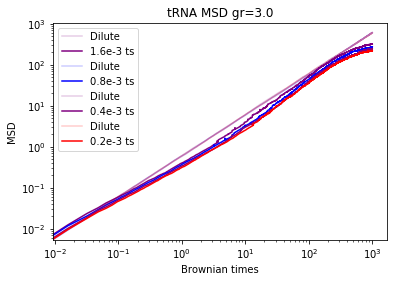

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190827_1214/"
n =50
plt.plot(MSD(path+data,0,n,'tRNA')[2],MSD(path+data,0,n,'tRNA')[1],color='purple',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,5*n,6*n,'tRNA')[2],MSD(path+data,5*n,6*n,'tRNA')[1],color='purple',label="1.6e-3 ts")

plt.plot(MSD(path+data,n,2*n,'tRNA')[2],MSD(path+data,n,2*n,'tRNA')[1],color='blue',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,6*n,7*n,'tRNA')[2],MSD(path+data,6*n,7*n,'tRNA')[1],color='blue',label="0.8e-3 ts")

plt.plot(MSD(path+data,2*n,3*n,'tRNA')[2],MSD(path+data,2*n,3*n,'tRNA')[1],color='purple',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,7*n,8*n,'tRNA')[2],MSD(path+data,7*n,8*n,'tRNA')[1],color='purple',label="0.4e-3 ts")

plt.plot(MSD(path+data,3*n,4*n,'tRNA')[2],MSD(path+data,3*n,4*n,'tRNA')[1],color='red',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,8*n,9*n,'tRNA')[2],MSD(path+data,8*n,9*n,'tRNA')[1],color='red',label="0.2e-3 ts")

#plt.plot(MSD(path+data,4*n,5*n,'tRNA')[2],MSD(path+data,4*n,5*n,'tRNA')[1],color='green',alpha=0.2,label="Dilute")
#plt.plot(MSD(path+data,9*n,10*n,'tRNA')[2],MSD(path+data,9*n,10*n,'tRNA')[1],color='green',label="0.1e-3 ts")

plt.legend()
plt.title('tRNA MSD gr=3.0')
plt.yscale('log')
plt.xscale('log')


plt.xlabel("Brownian times")
plt.ylabel("MSD")

Text(0, 0.5, 'MSD')

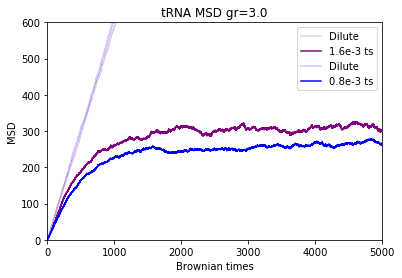

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190827_1629/"
n =50
plt.plot(MSD(path+data,0,n,'tRNA')[2],MSD(path+data,0,n,'tRNA')[1],color='purple',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,5*n,6*n,'tRNA')[2],MSD(path+data,5*n,6*n,'tRNA')[1],color='purple',label="1.6e-3 ts")

plt.plot(MSD(path+data,n,2*n,'tRNA')[2],MSD(path+data,n,2*n,'tRNA')[1],color='blue',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,6*n,7*n,'tRNA')[2],MSD(path+data,6*n,7*n,'tRNA')[1],color='blue',label="0.8e-3 ts")

#plt.plot(MSD(path+data,2*n,3*n,'tRNA')[2],MSD(path+data,2*n,3*n,'tRNA')[1],color='purple',alpha=0.2,label="Dilute")
#plt.plot(MSD(path+data,7*n,8*n,'tRNA')[2],MSD(path+data,7*n,8*n,'tRNA')[1],color='purple',label="0.4e-3 ts")

#plt.plot(MSD(path+data,3*n,4*n,'tRNA')[2],MSD(path+data,3*n,4*n,'tRNA')[1],color='red',alpha=0.2,label="Dilute")
#plt.plot(MSD(path+data,8*n,9*n,'tRNA')[2],MSD(path+data,8*n,9*n,'tRNA')[1],color='red',label="0.2e-3 ts")

#plt.plot(MSD(path+data,4*n,5*n,'tRNA')[2],MSD(path+data,4*n,5*n,'tRNA')[1],color='green',alpha=0.2,label="Dilute")
#plt.plot(MSD(path+data,9*n,10*n,'tRNA')[2],MSD(path+data,9*n,10*n,'tRNA')[1],color='green',label="0.1e-3 ts")

plt.legend()
plt.title('tRNA MSD gr=3.0')

plt.xlim(0,5000)
plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

Error (e.g., Missing expt or incorrect input)
[2.95536096 2.95016454 2.96260465 2.95987335 2.93966185 2.07933994
 2.04257778 1.98657799 1.89204448 1.75996658]


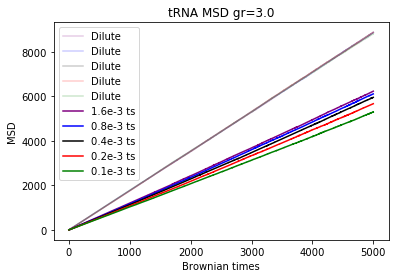

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190827_2129/"
n =50
slopes = list()

MSD_vals = MSD(path+data,0,n,'crowder')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='purple',alpha=0.2,label="Dilute")

MSD_vals=MSD(path+data,n,2*n,'crowder')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='blue',alpha=0.2,label="Dilute")

MSD_vals=MSD(path+data,2*n,3*n,'crowder')
plt.plot(MSD_vals[2],MSD_vals[1],color='black',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,3*n,4*n,'crowder')
plt.plot(MSD_vals[2],MSD_vals[1],color='red',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,4*n,5*n,'crowder')
plt.plot(MSD_vals[2],MSD_vals[1],color='green',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])


MSD_vals = MSD(path+data,5*n,6*n,'crowder')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='purple',label="1.6e-3 ts")


MSD_vals=MSD(path+data,6*n,7*n,'crowder')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='blue',label="0.8e-3 ts")

MSD_vals=MSD(path+data,7*n,8*n,'crowder')
plt.plot(MSD_vals[2],MSD_vals[1],color='black',label="0.4e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,8*n,9*n,'crowder')
plt.plot(MSD_vals[2],MSD_vals[1],color='red',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,9*n,10*n,'crowder')
plt.plot(MSD_vals[2],MSD_vals[1],color='green',label="0.1e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*10/6)

Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)


Text(0, 0.5, 'MSD')

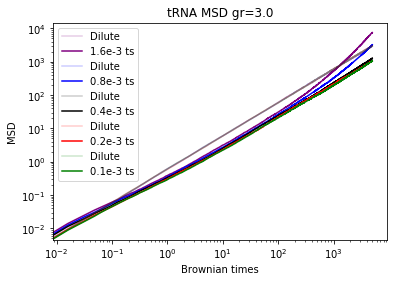

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190827_2129/"
n =50
plt.plot(MSD(path+data,0,n,'tRNA')[2],MSD(path+data,0,n,'tRNA')[1],color='purple',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,5*n,6*n,'tRNA')[2],MSD(path+data,5*n,6*n,'tRNA')[1],color='purple',label="1.6e-3 ts")

plt.plot(MSD(path+data,n,2*n,'tRNA')[2],MSD(path+data,n,2*n,'tRNA')[1],color='blue',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,6*n,7*n,'tRNA')[2],MSD(path+data,6*n,7*n,'tRNA')[1],color='blue',label="0.8e-3 ts")

plt.plot(MSD(path+data,2*n,3*n,'tRNA')[2],MSD(path+data,2*n,3*n,'tRNA')[1],color='black',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,7*n,8*n,'tRNA')[2],MSD(path+data,7*n,8*n,'tRNA')[1],color='black',label="0.4e-3 ts")

plt.plot(MSD(path+data,3*n,4*n,'tRNA')[2],MSD(path+data,3*n,4*n,'tRNA')[1],color='red',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,8*n,9*n,'tRNA')[2],MSD(path+data,8*n,9*n,'tRNA')[1],color='red',label="0.2e-3 ts")

plt.plot(MSD(path+data,4*n,5*n,'tRNA')[2],MSD(path+data,4*n,5*n,'tRNA')[1],color='green',alpha=0.2,label="Dilute")
plt.plot(MSD(path+data,9*n,10*n,'tRNA')[2],MSD(path+data,9*n,10*n,'tRNA')[1],color='green',label="0.1e-3 ts")

plt.legend()
plt.title('tRNA MSD gr=3.0')

plt.yscale('log')
plt.xscale('log')
plt.xlabel("Brownian times")
plt.ylabel("MSD")

Error (e.g., Missing expt or incorrect input)
[0.97368813 0.95890772 0.98604234 1.00425969 1.00245001 2.37160087
 2.01308272 1.20357732 0.63627952 0.38405242]


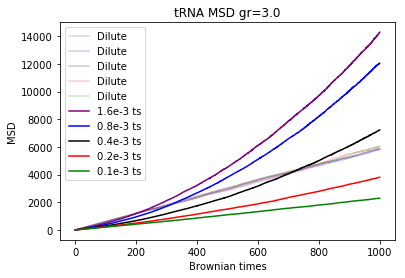

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190828_0953/"
n =50
slopes = list()

MSD_vals = MSD(path+data,0,n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='purple',alpha=0.2,label="Dilute")

MSD_vals=MSD(path+data,n,2*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='blue',alpha=0.2,label="Dilute")

MSD_vals=MSD(path+data,2*n,3*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='black',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,3*n,4*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='red',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,4*n,5*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='green',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals = MSD(path+data,5*n,6*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='purple',label="1.6e-3 ts")

MSD_vals=MSD(path+data,6*n,7*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='blue',label="0.8e-3 ts")

MSD_vals=MSD(path+data,7*n,8*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='black',label="0.4e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,8*n,9*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='red',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,9*n,10*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='green',label="0.1e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)/6)

Error (e.g., Missing expt or incorrect input)
[1.01766736 1.01014787 1.00192681 0.99949906 0.98879983 0.89249226
 0.69007368 0.40214266 0.35436812 0.32399653]


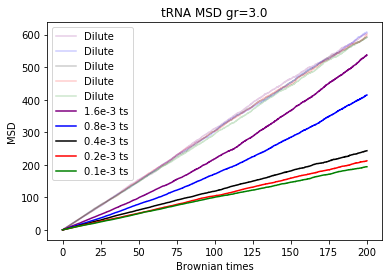

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190828_1313/"
n =50
slopes = list()

MSD_vals = MSD(path+data,0,n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='purple',alpha=0.2,label="Dilute")

MSD_vals=MSD(path+data,n,2*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='blue',alpha=0.2,label="Dilute")

MSD_vals=MSD(path+data,2*n,3*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='black',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,3*n,4*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='red',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,4*n,5*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='green',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals = MSD(path+data,5*n,6*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='purple',label="1.6e-3 ts")

MSD_vals=MSD(path+data,6*n,7*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='blue',label="0.8e-3 ts")

MSD_vals=MSD(path+data,7*n,8*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='black',label="0.4e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,8*n,9*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='red',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,9*n,10*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='green',label="0.1e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*2/6)

Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
[1.005242   0.95541998 0.97250542 0.97279157 1.02032354 0.52827792
 0.41131094 0.38462224 0.36288601 0.3525953 ]


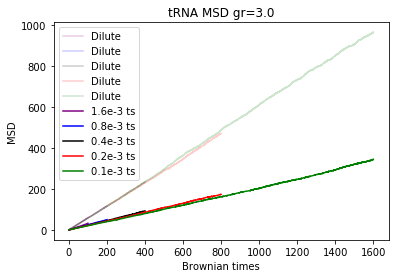

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190828_1838/"
n =50
slopes = list()

MSD_vals = MSD(path+data,0,n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='purple',alpha=0.2,label="Dilute")

MSD_vals=MSD(path+data,n,2*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='blue',alpha=0.2,label="Dilute")

MSD_vals=MSD(path+data,2*n,3*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='black',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,3*n,4*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='red',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,4*n,5*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='green',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals = MSD(path+data,5*n,6*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='purple',label="1.6e-3 ts")

MSD_vals=MSD(path+data,6*n,7*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='blue',label="0.8e-3 ts")

MSD_vals=MSD(path+data,7*n,8*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='black',label="0.4e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,8*n,9*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='red',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,9*n,10*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='green',label="0.1e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*10/6)

Error (e.g., Missing expt or incorrect input)
[1.02107398 1.01766918 0.99767268 0.98407655 0.99265705 0.62764468
 0.47375726 0.3980833  0.45613784 0.48845887]


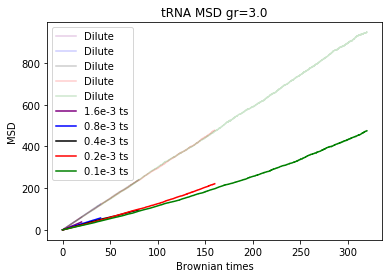

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190828_2244/"
n =50
slopes = list()

MSD_vals = MSD(path+data,0,n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='purple',alpha=0.2,label="Dilute")

MSD_vals=MSD(path+data,n,2*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='blue',alpha=0.2,label="Dilute")

MSD_vals=MSD(path+data,2*n,3*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='black',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,3*n,4*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='red',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,4*n,5*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='green',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals = MSD(path+data,5*n,6*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='purple',label="1.6e-3 ts")

MSD_vals=MSD(path+data,6*n,7*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2],MSD_vals[1],color='blue',label="0.8e-3 ts")

MSD_vals=MSD(path+data,7*n,8*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='black',label="0.4e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,8*n,9*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='red',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,9*n,10*n,'tRNA')
plt.plot(MSD_vals[2],MSD_vals[1],color='green',label="0.1e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*2/6)

Error (e.g., Missing expt or incorrect input)
[1.01592314 0.98388433 1.02073143 1.01673642 0.52394881 0.43406121
 0.36892696 0.37433823]


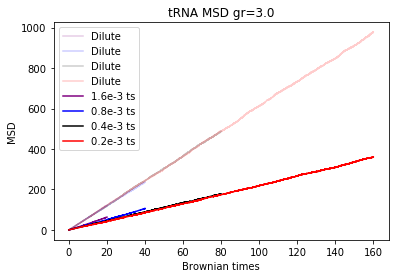

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190829_0121/"
n =50
slopes = list()
res_steps=50

MSD_vals = MSD(path+data,0,n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='purple',alpha=0.2,label="Dilute")

MSD_vals=MSD(path+data,n,2*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='blue',alpha=0.2,label="Dilute")

MSD_vals=MSD(path+data,2*n,3*n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='black',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,3*n,4*n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='red',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

#MSD_vals=MSD(path+data,4*n,5*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps*16),MSD_vals[1],color='green',alpha=0.2,label="Dilute")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals = MSD(path+data,5*n,6*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps*1),MSD_vals[1],color='purple',label="1.6e-3 ts")

MSD_vals=MSD(path+data,6*n,7*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='blue',label="0.8e-3 ts")

MSD_vals=MSD(path+data,7*n,8*n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='black',label="0.4e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,8*n,9*n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='red',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

#MSD_vals=MSD(path+data,9*n,10*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps*16),MSD_vals[1],color='green',label="0.1e-3 ts")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*50/6)

Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
[0.73563076 0.45180364 0.38261088 0.35781466]


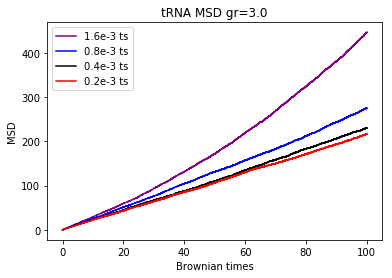

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190830_1305/"
n =50
slopes = list()
res_steps=50

#MSD_vals = MSD(path+data,0,n,'tRNA')
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
#plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='purple',alpha=0.2,label="Dilute")

#MSD_vals=MSD(path+data,n,2*n,'tRNA')
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
#plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='blue',alpha=0.2,label="Dilute")

#MSD_vals=MSD(path+data,2*n,3*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='black',alpha=0.2,label="Dilute")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

#MSD_vals=MSD(path+data,3*n,4*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='red',alpha=0.2,label="Dilute")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

#MSD_vals=MSD(path+data,4*n,5*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps*16),MSD_vals[1],color='green',alpha=0.2,label="Dilute")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals = MSD(path+data,5*n,6*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps*1),MSD_vals[1],color='purple',label="1.6e-3 ts")

MSD_vals=MSD(path+data,6*n,7*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='blue',label="0.8e-3 ts")

MSD_vals=MSD(path+data,7*n,8*n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='black',label="0.4e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,8*n,9*n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='red',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

#MSD_vals=MSD(path+data,9*n,10*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps*16),MSD_vals[1],color='green',label="0.1e-3 ts")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*res_steps/6)

[0.73551607 0.45178733 0.38416225]


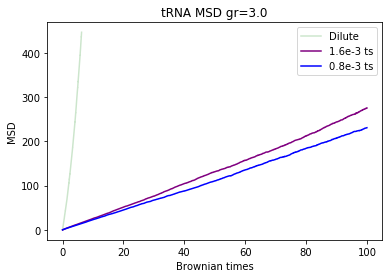

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190830_1821/"
n =50
slopes = list()
res_steps=50

#MSD_vals = MSD(path+data,0,n,'tRNA')
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
#plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='purple',alpha=0.2,label="Dilute")

#MSD_vals=MSD(path+data,n,2*n,'tRNA')
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
#plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='blue',alpha=0.2,label="Dilute")

#MSD_vals=MSD(path+data,2*n,3*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='black',alpha=0.2,label="Dilute")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

#MSD_vals=MSD(path+data,3*n,4*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='red',alpha=0.2,label="Dilute")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,4*n,5*n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps*16),MSD_vals[1],color='green',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals = MSD(path+data,5*n,6*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps*1),MSD_vals[1],color='purple',label="1.6e-3 ts")

MSD_vals=MSD(path+data,6*n,7*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='blue',label="0.8e-3 ts")

#MSD_vals=MSD(path+data,7*n,8*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='black',label="0.4e-3 ts")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

#MSD_vals=MSD(path+data,8*n,9*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='red',label="0.2e-3 ts")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

#MSD_vals=MSD(path+data,9*n,10*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps*16),MSD_vals[1],color='green',label="0.1e-3 ts")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*res_steps/6)

Error (e.g., Missing expt or incorrect input)
[1.02504952 1.02335621 1.01415527 1.02077605 0.58775725 0.42009636
 0.37929901 0.34573281]


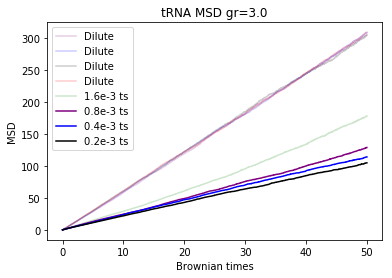

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190830_2235/"
n =50
slopes = list()
res_steps=300

MSD_vals = MSD(path+data,0,n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='purple',alpha=0.2,label="Dilute")

MSD_vals=MSD(path+data,n,2*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='blue',alpha=0.2,label="Dilute")

MSD_vals=MSD(path+data,2*n,3*n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='black',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,3*n,4*n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='red',alpha=0.2,label="Dilute")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals=MSD(path+data,4*n,5*n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='green',alpha=0.2,label="1.6e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals = MSD(path+data,5*n,6*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps*1),MSD_vals[1],color='purple',label="0.8e-3 ts")

MSD_vals=MSD(path+data,6*n,7*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='blue',label="0.4e-3 ts")

MSD_vals=MSD(path+data,7*n,8*n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='black',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*res_steps/6)

[0.58238225 0.58351987 0.57255747]


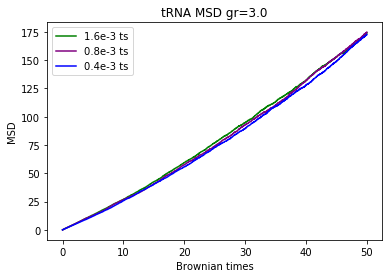

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190831_1445/"
n =50
slopes = list()
res_steps=300
k=1500

MSD_vals=MSD(path+data,k+0,k+n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='green',label="1.6e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals = MSD(path+data,k+1*n,k+2*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps*1),MSD_vals[1],color='purple',label="0.8e-3 ts")

MSD_vals=MSD(path+data,k+2*n,k+3*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='blue',label="0.4e-3 ts")

#MSD_vals=MSD(path+data,k+3*n,k+4*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='black',label="0.2e-3 ts")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

#MSD_vals=MSD(path+data,k+4*n,k+5*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='red',label="0.1e-3 ts")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])


plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*res_steps/6)

[0.57729244 0.43710464 0.37819892 0.36661446]


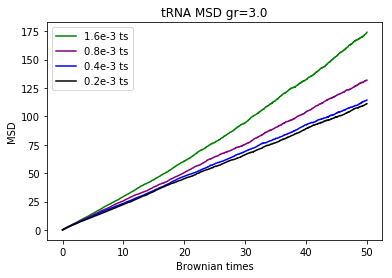

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190831_2354/"
n =50
slopes = list()
res_steps=100
k=1250

MSD_vals=MSD(path+data,k+0,k+n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='green',label="1.6e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals = MSD(path+data,k+1*n,k+2*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps*1),MSD_vals[1],color='purple',label="0.8e-3 ts")

MSD_vals=MSD(path+data,k+2*n,k+3*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='blue',label="0.4e-3 ts")

MSD_vals=MSD(path+data,k+3*n,k+4*n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='black',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

#MSD_vals=MSD(path+data,k+4*n,k+5*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='red',label="0.1e-3 ts")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*res_steps/6)

[0.48397161 0.50802568 0.58835294 0.56066212]


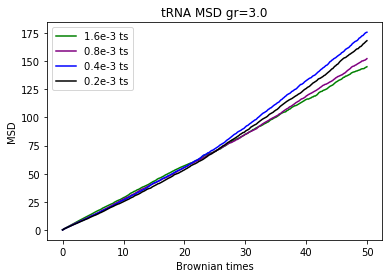

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190901_1647/"
n =50
slopes = list()
res_steps=10
k=1000

MSD_vals=MSD(path+data,k+0,k+n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='green',label="1.6e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

MSD_vals = MSD(path+data,k+1*n,k+2*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps*1),MSD_vals[1],color='purple',label="0.8e-3 ts")

MSD_vals=MSD(path+data,k+2*n,k+3*n,'tRNA')
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='blue',label="0.4e-3 ts")

MSD_vals=MSD(path+data,k+3*n,k+4*n,'tRNA')
plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='black',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

#MSD_vals=MSD(path+data,k+4*n,k+5*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='red',label="0.1e-3 ts")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*res_steps/6)

In [ ]:
MSD_vals=MSD(path+data,k+4*n,k+5*n,'tRNA')
print(linregress(MSD_vals[2][250:],MSD_vals[1][250:])[0])

[0.74005848 1.7437074  2.98480238 3.36335309]


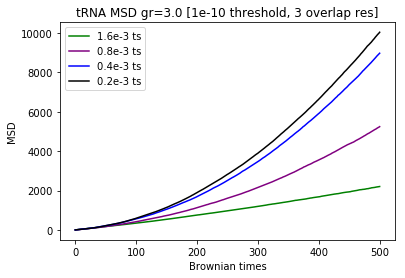

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190902_0223/"
n = 20
slopes = list()
res_steps=3
k=200
start=0
end=-1

MSD_vals=MSD(path+data, 0,50,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='green',label="1.6e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals = MSD(path+data,200,250,'tRNA')
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps*1),MSD_vals[1][start:end],color='purple',label="0.8e-3 ts")

MSD_vals=MSD(path+data,400,450,'tRNA')
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='blue',label="0.4e-3 ts")

MSD_vals=MSD(path+data,600,650,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='black',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

#MSD_vals=MSD(path+data,5*k+n,5*k+2*n,'tRNA')
#plt.plot(MSD_vals[2]/(res_steps),MSD_vals[1],color='red',label="0.1e-3 ts")
#slopes.append(linregress(MSD_vals[2],MSD_vals[1])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")
plt.title('tRNA MSD gr=3.0 [1e-10 threshold, 3 overlap res]')


print(np.array(slopes)*res_steps/6)

Error (e.g., Missing expt or incorrect input)
[3.78331674 1.05795852 0.39725329 0.41814489 0.43660682]


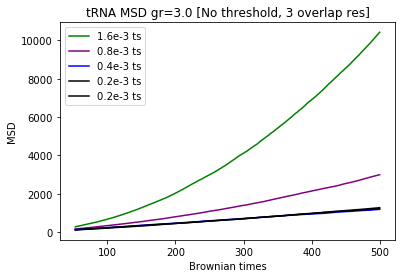

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190902_1144/" 
n = 50
slopes = list()
res_steps=3
k=50
start=100
end=-1

MSD_vals=MSD(path+data,0,50,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='green',label="1.6e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals = MSD(path+data,50,100,'tRNA')
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps*1),MSD_vals[1][start:end],color='purple',label="0.8e-3 ts")

MSD_vals=MSD(path+data,100,150,'tRNA')
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='blue',label="0.4e-3 ts")

MSD_vals=MSD(path+data,150,200,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='black',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals=MSD(path+data,200,250,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='black',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0 [No threshold, 3 overlap res]')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*res_steps/6)

Error (e.g., Missing expt or incorrect input)
[1.49579214 1.2316858  0.81529192 0.49155646 0.36844625]


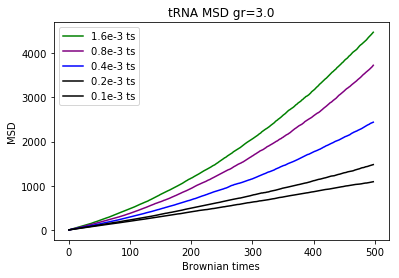

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190902_1746/" 
n = 50
slopes = list()
res_steps=1
k=50
start=0
end=-1

MSD_vals=MSD(path+data,0,50,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='green',label="1.6e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals = MSD(path+data,50,100,'tRNA')
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps*1),MSD_vals[1][start:end],color='purple',label="0.8e-3 ts")

MSD_vals=MSD(path+data,100,150,'tRNA')
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='blue',label="0.4e-3 ts")

MSD_vals=MSD(path+data,150,200,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='black',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals=MSD(path+data,200,250,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='black',label="0.1e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*res_steps/6)

Error (e.g., Missing expt or incorrect input)
[1.08367407 0.60425254 0.39499094]


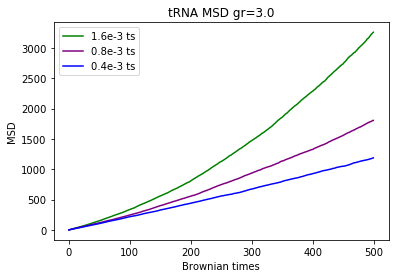

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190903_0147/" 
n = 50
slopes = list()
res_steps=3
k=50
start=0
end=-1

MSD_vals=MSD(path+data,0,50,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='green',label="1.6e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals = MSD(path+data,50,100,'tRNA')
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps*1),MSD_vals[1][start:end],color='purple',label="0.8e-3 ts")

MSD_vals=MSD(path+data,100,150,'tRNA')
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='blue',label="0.4e-3 ts")

#MSD_vals=MSD(path+data,150,200,'tRNA')
#plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='black',label="0.2e-3 ts")
#slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

#MSD_vals=MSD(path+data,200,250,'tRNA')
#plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='black',label="0.1e-3 ts")
#slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*res_steps/6)

[1.42871752 1.22181562 0.81209394 0.49126162 0.36892669]


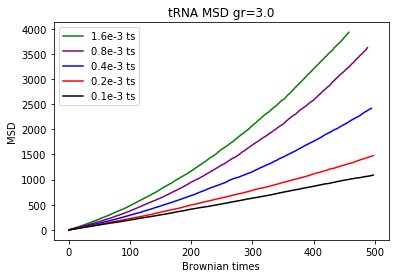

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190903_0350/" 
n = 50
slopes = list()
res_steps=1
k=0
start=0
end=-1

MSD_vals=MSD(path+data,k,k+n,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='green',label="1.6e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals = MSD(path+data,k+n,k+2*n,'tRNA')
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps*1),MSD_vals[1][start:end],color='purple',label="0.8e-3 ts")

MSD_vals=MSD(path+data,k+2*n,k+3*n,'tRNA')
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='blue',label="0.4e-3 ts")

MSD_vals=MSD(path+data,k+3*n,k+4*n,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='red',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals=MSD(path+data,k+4*n,k+5*n,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='black',label="0.1e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*res_steps/6)


[1.00852421 0.53105795 0.38434434 0.32209857 0.32776156]


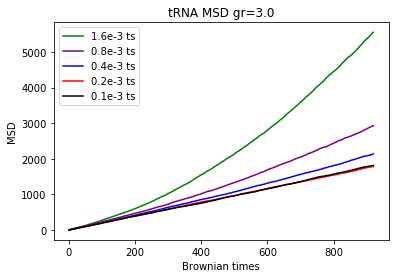

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190903_1848/" 
n = 50
slopes = list()
res_steps=5
k=750
start=0
end=-1

MSD_vals=MSD(path+data,k,k+n,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='green',label="1.6e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals = MSD(path+data,k+n,k+2*n,'tRNA')
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps*1),MSD_vals[1][start:end],color='purple',label="0.8e-3 ts")

MSD_vals=MSD(path+data,k+2*n,k+3*n,'tRNA')
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='blue',label="0.4e-3 ts")

MSD_vals=MSD(path+data,k+3*n,k+4*n,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='red',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals=MSD(path+data,k+4*n,k+5*n,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='black',label="0.1e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

#plt.xlim(0,5000)
#plt.ylim(0,600)

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*res_steps/6)

[1.65839531 0.79883469 0.4450763  0.34770564 0.32011855]


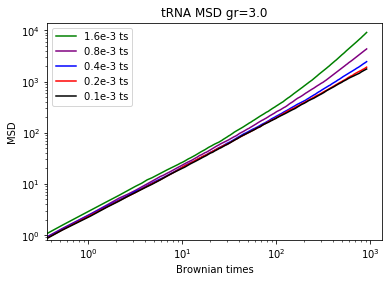

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190903_1848/" 
n = 50
slopes = list()
res_steps=3
k=500
start=0
end=-1

MSD_vals=MSD(path+data,k,k+n,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='green',label="1.6e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals = MSD(path+data,k+n,k+2*n,'tRNA')
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps*1),MSD_vals[1][start:end],color='purple',label="0.8e-3 ts")

MSD_vals=MSD(path+data,k+2*n,k+3*n,'tRNA')
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='blue',label="0.4e-3 ts")

MSD_vals=MSD(path+data,k+3*n,k+4*n,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='red',label="0.2e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals=MSD(path+data,k+4*n,k+5*n,'tRNA')
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='black',label="0.1e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

plt.legend()
plt.title('tRNA MSD gr=3.0')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Brownian times")
plt.ylabel("MSD")

print(np.array(slopes)*res_steps/6)


Error (e.g., Missing expt or incorrect input)


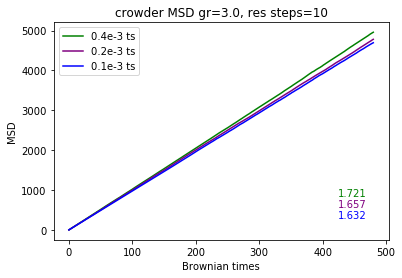

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190905_0050/" 
n = 50
slopes = list()
res_steps=10
k=1650
start=0
end=-1
species = 'crowder'

colors = ['green','purple','blue']
MSD_vals=MSD(path+data,k,k+n,species)
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='green',label="0.4e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals = MSD(path+data,k+n,k+2*n,species)
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps*1),MSD_vals[1][start:end],color='purple',label="0.2e-3 ts")

MSD_vals=MSD(path+data,k+2*n,k+3*n,species)
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='blue',label="0.1e-3 ts")

plt.legend()
plt.title(species + ' MSD gr=3.0'+", res steps="+str(res_steps))

plt.xlabel("Brownian times")
plt.ylabel("MSD")

for i in range(len(slopes)):
    plt.text(0.85,0.2-0.05*i,np.round(np.array(slopes)*res_steps/6,3)[i],color=colors[i],transform=plt.gca().transAxes)

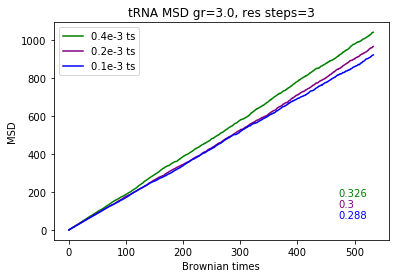

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190906_1302/" 
n = 50
slopes = list()
res_steps=3
k=0
start=0
end=1000
species = 'tRNA'

colors = ['green','purple','blue','orange']
MSD_vals=MSD(path+data,k,k+n,species)
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='green',label="0.4e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals = MSD(path+data,k+n,k+2*n,species)
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps*1),MSD_vals[1][start:end],color='purple',label="0.2e-3 ts")

MSD_vals=MSD(path+data,k+2*n,k+3*n,species)
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='blue',label="0.1e-3 ts")

#MSD_vals=MSD(path+data,k+3*n,k+4*n,species)
#slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
#plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='orange',label="0.05e-3 ts")

plt.legend()
plt.title(species + ' MSD gr=3.0'+", res steps="+str(res_steps))

plt.xlabel("Brownian times")
plt.ylabel("MSD")

for i in range(len(slopes)):
    plt.text(0.85,0.2-0.05*i,np.round(np.array(slopes)*res_steps/6,3)[i],color=colors[i],transform=plt.gca().transAxes)

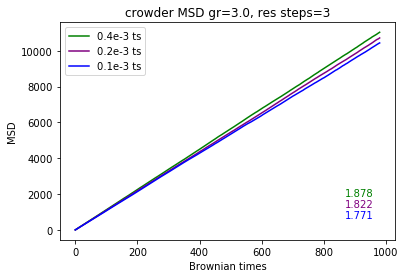

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190910_0029/" 
n = 50
slopes = list()
res_steps=3
k=0
start=0
end=-1
species = 'crowder'

colors = ['green','purple','blue','orange']
MSD_vals=MSD(path+data,k,k+n,species)
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='green',label="0.4e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

MSD_vals = MSD(path+data,k+n,k+2*n,species)
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps*1),MSD_vals[1][start:end],color='purple',label="0.2e-3 ts")

MSD_vals=MSD(path+data,k+2*n,k+3*n,species)
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='blue',label="0.1e-3 ts")

#MSD_vals=MSD(path+data,k+3*n,k+4*n,species)
#slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
#plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='orange',label="0.05e-3 ts")

plt.legend()
plt.title(species + ' MSD gr=3.0'+", res steps="+str(res_steps))

plt.xlabel("Brownian times")
plt.ylabel("MSD")

for i in range(len(slopes)):
    plt.text(0.85,0.2-0.05*i,np.round(np.array(slopes)*res_steps/6,3)[i],color=colors[i],transform=plt.gca().transAxes)

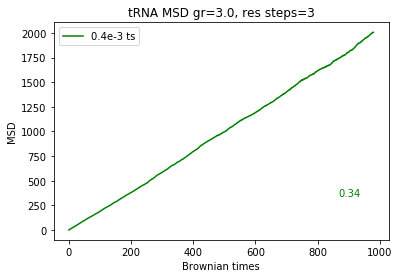

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposRibosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolpostRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('MolpostRNA' , 'MolposCrowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='Z_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190914_0252/" 
n = 50
slopes = list()
res_steps=3
k=0
start=0
end=-1
species = 'tRNA'

colors = ['green','purple','blue','orange']
MSD_vals=MSD(path+data,k,k+n,species)
plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='green',label="0.4e-3 ts")
slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])

#MSD_vals = MSD(path+data,k+n,k+2*n,species)
#slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
#plt.plot(MSD_vals[2][start:end]/(res_steps*1),MSD_vals[1][start:end],color='purple',label="0.2e-3 ts")

#MSD_vals=MSD(path+data,k+2*n,k+3*n,species)
#slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
#plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='blue',label="0.1e-3 ts")

#MSD_vals=MSD(path+data,k+3*n,k+4*n,species)
#slopes.append(linregress(MSD_vals[2][start:end],MSD_vals[1][start:end])[0])
#plt.plot(MSD_vals[2][start:end]/(res_steps),MSD_vals[1][start:end],color='orange',label="0.05e-3 ts")

plt.legend()
plt.title(species + ' MSD gr=3.0'+", res steps="+str(res_steps))

plt.xlabel("Brownian times")
plt.ylabel("MSD")

for i in range(len(slopes)):
    plt.text(0.85,0.2-0.05*i,np.round(np.array(slopes)*res_steps/6,3)[i],color=colors[i],transform=plt.gca().transAxes)